#### "Coding a 2 layer Neural Network from scratch" and will go through the essentials in making a neural network 

This is with the intention of utilising this base code in my third year individual project. 
https://towardsdatascience.com/coding-a-2-layer-neural-network-from-scratch-in-python-4dd022d19fd2

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

#### Setting up the neural net

This requires all the spaces in memory which will store values as the net makes a pass going forward, and which it will need to call again later. 
There is still some functionality and python linguistics which I do not understand, however, this is helpful in understanding the overall concepts of the neural net. 


In [215]:


def sigmoid(Z):
    return 1/(1+np.exp(-Z))
        
def reLu(Z):   
    return np.maximum(0, Z)



#now its time for the back propogation
#this includes finding the differentials for all the functions, so that you can see in which way the gradients 
#are travelling, and therefore look for the weights which will minimize the loss function.
def derivativeRelu(x):
    x[x<0] = 0 
    x[x>0] = 1
    return x 

def derivativeSigmoid(Z):
    s = 1/(1 + np.exp(-Z))
    dz = s * ( 1-s)
    return dz





class myNet: 
    
    #This will set up the neural net, with the necessary dictionaries, arrays and matrices which will store the input
    #and other necessary values 
    def __init__(self, inputVal, results):
        self.X = inputVal
        self.Y = results
        self.Yh = np.zeros((1, self.Y.shape[1]))
        self.threshold = 0.5
        
        self.numLayers = 2
        self.dimensions = [9, 15, 1]
        
    
        #these dictionaries are for storing necessary data
        self.param = {}
        self.cache = {}
        self.gradients = {}
        
        self.loss = []
        self.learningRate = 0.003
        self.trainingSamples = self.Y.shape[1]
        
        
        
    #This function will set up the initial weights and biases randomly 
    def paramsInit(self):
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dimensions[1], self.dimensions[0]) / np.sqrt(self.dimensions[0])
        self.param['b1'] = np.zeros((self.dimensions[1], 1))
        
        self.param['W2'] = np.random.randn(self.dimensions[2], self.dimensions[1]) / np.sqrt(self.dimensions[1])
        self.param['b2'] = np.zeros((self.dimensions[2], 1))
    
        return
    
    
    #Here are the functions for the forward pass and initial calculations
    
    # The activation functions we will be using in this forward pass
    # the activation functions are necessary to ensure that the whole neural net does not remain linear 
    # if it remains linear, the net will not produce more accurate results. 
    

    def forwardPass(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = reLu(Z1)
        self.cache['Z1'], self.cache['A1'] = Z1, A1 
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = sigmoid(Z2)
        self.cache['Z2'], self.cache['A2'] = Z2, A2 
        
        self.Yh = A2
        loss = self.currentClassificationLoss(A2)
        
        return self.Yh, loss
    
    
    
    #This neural net will be doing binary classification and so is using the loss function called Cross-Entropy
    #loss function
    def currentClassificationLoss(self, Yh):
        loss = (1./self.trainingSamples) * (-np.dot(self.Y, np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))
        return loss 
    
    
    

    
    #need to find the derivatives for Loss with respect to W1 W2 B1 B2, this is done through calculus and 
    #backpropogation - THE GRADIENT DESCENT OPTIMIZATION ALGORITHM 

    def backwards(self):
        
        derivativeLossYh = - ( np.divide(self.Y, self.Yh) - np.divide(1 - self.Y, 1 - self.Yh))
        derivativeLossZ2 = derivativeLossYh * derivativeSigmoid(self.cache['Z2'])
        derivativeLossA1 = np.dot(self.param["W2"].T, derivativeLossZ2)
        derivativeLossW2 = 1./self.cache['A1'].shape[1] * np.dot(derivativeLossZ2, self.cache['A1'].T)
        derivativeLossB2 = 1./self.cache['A1'].shape[1] * np.dot(derivativeLossZ2, np.ones([derivativeLossZ2.shape[1],1]))
        
        derivativeLossZ1 = derivativeLossA1 * derivativeRelu(self.cache['Z1'])
        derivativeLossA0 = np.dot(self.param["W1"].T, derivativeLossZ1)
        derivativeLossW1 = 1./self.X.shape[1] * np.dot(derivativeLossZ1 ,self.X.T)
        derivativeLossB1 = 1./self.X.shape[1] * np.dot(derivativeLossZ1, np.ones([derivativeLossZ1.shape[1],1])) 
        
        
        #if the derivative is negative, it means increasing the weight makes the loss decrease
        #if the derivative is positive, it means decreasing the weight makes the loss decrease 
        self.param["W1"] = self.param["W1"] - self.learningRate * derivativeLossW1
        self.param["b1"] = self.param["b1"] - self.learningRate * derivativeLossB1
        self.param["W2"] = self.param["W2"] - self.learningRate * derivativeLossW2
        self.param["b2"] = self.param["b2"] - self.learningRate * derivativeLossB2
        

    
# all this does is run through the neural net several times (iterations declared) and it will look for the minima in 
# the region which will reduce the loss. 
    def gd(self,X, Y, iter = 3000):
        np.random.seed(1)                         
    
        self.paramsInit()
    
        for i in range(0, iter):
            Yh, loss=self.forwardPass()
            self.backwards()
        
            if i % 500 == 0:
                print ("Cost after iteration %i: %f" %(i, loss))
                self.loss.append(loss)
                plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.learningRate))
        plt.show()
        return
    
    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forwardPass()    

        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0

        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))

        return comp

        

    
    Now we have completed the forward pass, made a prediction, calculated the loss, and updated the parameters 
    to improve the weightings so they make a better prediction. 
    

    After this point the most important work is improving the hyperparameters and improving the input data (feature engineering) 

#### Data analysis and running it on the neural net 

a few changes will need to be made to the data:
- firstly, you need to clean the data, removing any missing data points 
- secondly, neural nets work better in the range 0 - 1 for a prediction (that is why we are using sigmoids function), therefore we will ensure that the data produces a value between 0 and 1 


# Feature Engineering

In [190]:
df = pd.read_csv('/Users/danielraad/Desktop/layeredneuralnet/breast-cancer-wisconsin.csv', header=None)
df.head()



,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [191]:
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)


In [192]:
#removing missing rows 
df = df[df[6] != '?']

In [193]:
df = df.astype(float)

In [194]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0
5,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,1.0
6,1018099.0,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,0.0
7,1018561.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
8,1033078.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,0.0
9,1033078.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0


In [195]:
#data normalization to ensure the values are between 0 and 1
# various ways to perform data normalization, it depends on the data you are using and what your goals are.
# two popular techniques are min max scaling and standerdising 
# here, min max scaling is used 
# both min max and the standerdizer are susceptible to outliers and so there are others you can look at in the future

names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df[10] = df[10]

In [196]:
scaled_df.head(15)

,0,1,2,3,4,5,6,7,8,9,10
0,0.069946,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
1,0.070164,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
2,0.071096,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
3,0.071160,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
4,0.071216,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
5,0.071223,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.000000,1.0
6,0.071296,0.000000,0.000000,0.000000,0.000000,0.111111,1.000000,0.222222,0.000000,0.000000,0.0
7,0.071331,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
8,0.072415,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.444444,0.0
9,0.072415,0.333333,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.0


Now the data is ready to be used. The next step is to train the model on the data. 
We need to be aware of both overfitting and underfitting, overfitting being the bigger issue. 
This requires regularization which comes in many ways. I will add regularization following the completion of the tutorial. 

In [197]:
x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()
xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

Cost after iteration 0: 0.673967
Cost after iteration 500: 0.388928
Cost after iteration 1000: 0.231340
Cost after iteration 1500: 0.171447
Cost after iteration 2000: 0.146433
Cost after iteration 2500: 0.133993
Cost after iteration 3000: 0.126808
Cost after iteration 3500: 0.122107
Cost after iteration 4000: 0.118650
Cost after iteration 4500: 0.116027
Cost after iteration 5000: 0.113934
Cost after iteration 5500: 0.112221
Cost after iteration 6000: 0.110783
Cost after iteration 6500: 0.109546
Cost after iteration 7000: 0.108474
Cost after iteration 7500: 0.107537
Cost after iteration 8000: 0.106710
Cost after iteration 8500: 0.105977
Cost after iteration 9000: 0.105317
Cost after iteration 9500: 0.104718
Cost after iteration 10000: 0.104174
Cost after iteration 10500: 0.103674
Cost after iteration 11000: 0.103216
Cost after iteration 11500: 0.102785
Cost after iteration 12000: 0.102377
Cost after iteration 12500: 0.101980
Cost after iteration 13000: 0.101604
Cost after iteration 1350

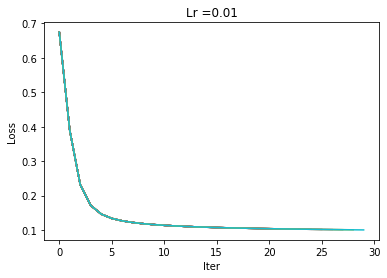

In [216]:
nn = myNet(x,y)
nn.learningRate=0.01
nn.dimensions = [9, 15, 1]
nn.gd(x, y, iter = 15000)

In [213]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

In [217]:
pred_train = nn.pred(x, y)
pred_test = nn.pred(xval, yval)

Acc: 0.9620000000000003
Acc: 1.0
